## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 59.9ms	remaining: 59.9s
1:	learn: 0.9301086	total: 66.3ms	remaining: 33.1s
2:	learn: 0.9005637	total: 69.9ms	remaining: 23.2s
3:	learn: 0.8720983	total: 72.9ms	remaining: 18.2s
4:	learn: 0.8467410	total: 76.1ms	remaining: 15.1s
5:	learn: 0.8226672	total: 79ms	remaining: 13.1s
6:	learn: 0.7994702	total: 82.3ms	remaining: 11.7s
7:	learn: 0.7784272	total: 85.3ms	remaining: 10.6s
8:	learn: 0.7602192	total: 88.5ms	remaining: 9.74s
9:	learn: 0.7412421	total: 91.6ms	remaining: 9.07s
10:	learn: 0.7247930	total: 94.5ms	remaining: 8.5s
11:	learn: 0.7089951	total: 97.9ms	remaining: 8.06s
12:	learn: 0.6951345	total: 101ms	remaining: 7.64s
13:	learn: 0.6809276	total: 103ms	remaining: 7.28s
14:	learn: 0.6692630	total: 113ms	remaining: 7.43s
15:	learn: 0.6588323	total: 116ms	remaining: 7.16s
16:	learn: 0.6472700	total: 119ms	remaining: 6.91s
17:	learn: 0.6379982	total: 122ms	remaining: 6.68s
18:	learn: 0.6294674	total: 125ms	remaining: 6.48s
19

38:	learn: 0.5255485	total: 187ms	remaining: 4.61s
39:	learn: 0.5217941	total: 190ms	remaining: 4.55s
40:	learn: 0.5196440	total: 193ms	remaining: 4.51s
41:	learn: 0.5170220	total: 196ms	remaining: 4.47s
42:	learn: 0.5141148	total: 199ms	remaining: 4.43s
43:	learn: 0.5116444	total: 202ms	remaining: 4.38s
44:	learn: 0.5100547	total: 205ms	remaining: 4.34s
45:	learn: 0.5069096	total: 208ms	remaining: 4.3s
46:	learn: 0.5051685	total: 214ms	remaining: 4.34s
47:	learn: 0.5033968	total: 217ms	remaining: 4.31s
48:	learn: 0.5012433	total: 221ms	remaining: 4.29s
49:	learn: 0.4986132	total: 224ms	remaining: 4.26s
50:	learn: 0.4968022	total: 227ms	remaining: 4.22s
51:	learn: 0.4951632	total: 230ms	remaining: 4.19s
52:	learn: 0.4928924	total: 233ms	remaining: 4.16s
53:	learn: 0.4917272	total: 235ms	remaining: 4.13s
54:	learn: 0.4895079	total: 238ms	remaining: 4.09s
55:	learn: 0.4881884	total: 241ms	remaining: 4.06s
56:	learn: 0.4861566	total: 244ms	remaining: 4.04s
57:	learn: 0.4850201	total: 247m

101:	learn: 0.4481325	total: 375ms	remaining: 3.3s
102:	learn: 0.4475445	total: 377ms	remaining: 3.28s
103:	learn: 0.4466014	total: 380ms	remaining: 3.27s
104:	learn: 0.4461730	total: 383ms	remaining: 3.26s
105:	learn: 0.4457259	total: 385ms	remaining: 3.25s
106:	learn: 0.4451085	total: 388ms	remaining: 3.24s
107:	learn: 0.4447909	total: 391ms	remaining: 3.23s
108:	learn: 0.4440936	total: 393ms	remaining: 3.21s
109:	learn: 0.4435519	total: 396ms	remaining: 3.2s
110:	learn: 0.4431075	total: 399ms	remaining: 3.19s
111:	learn: 0.4425498	total: 404ms	remaining: 3.2s
112:	learn: 0.4419106	total: 406ms	remaining: 3.19s
113:	learn: 0.4414425	total: 409ms	remaining: 3.18s
114:	learn: 0.4407446	total: 412ms	remaining: 3.17s
115:	learn: 0.4402011	total: 414ms	remaining: 3.16s
116:	learn: 0.4398559	total: 417ms	remaining: 3.15s
117:	learn: 0.4392990	total: 420ms	remaining: 3.14s
118:	learn: 0.4389153	total: 423ms	remaining: 3.13s
119:	learn: 0.4383331	total: 425ms	remaining: 3.12s
120:	learn: 0.4

164:	learn: 0.4184572	total: 565ms	remaining: 2.86s
165:	learn: 0.4180680	total: 568ms	remaining: 2.85s
166:	learn: 0.4176884	total: 570ms	remaining: 2.85s
167:	learn: 0.4173026	total: 573ms	remaining: 2.84s
168:	learn: 0.4170486	total: 576ms	remaining: 2.83s
169:	learn: 0.4165960	total: 579ms	remaining: 2.83s
170:	learn: 0.4161870	total: 581ms	remaining: 2.82s
171:	learn: 0.4156228	total: 584ms	remaining: 2.81s
172:	learn: 0.4153041	total: 587ms	remaining: 2.81s
173:	learn: 0.4148857	total: 590ms	remaining: 2.8s
174:	learn: 0.4144190	total: 593ms	remaining: 2.79s
175:	learn: 0.4140875	total: 595ms	remaining: 2.79s
176:	learn: 0.4136755	total: 598ms	remaining: 2.78s
177:	learn: 0.4133860	total: 601ms	remaining: 2.77s
178:	learn: 0.4129780	total: 604ms	remaining: 2.77s
179:	learn: 0.4122907	total: 606ms	remaining: 2.76s
180:	learn: 0.4119188	total: 609ms	remaining: 2.75s
181:	learn: 0.4115412	total: 612ms	remaining: 2.75s
182:	learn: 0.4112620	total: 615ms	remaining: 2.75s
183:	learn: 0

224:	learn: 0.3973704	total: 758ms	remaining: 2.61s
225:	learn: 0.3971729	total: 761ms	remaining: 2.6s
226:	learn: 0.3968841	total: 764ms	remaining: 2.6s
227:	learn: 0.3965787	total: 767ms	remaining: 2.6s
228:	learn: 0.3963073	total: 769ms	remaining: 2.59s
229:	learn: 0.3960925	total: 772ms	remaining: 2.58s
230:	learn: 0.3957018	total: 774ms	remaining: 2.58s
231:	learn: 0.3954162	total: 777ms	remaining: 2.57s
232:	learn: 0.3951665	total: 780ms	remaining: 2.57s
233:	learn: 0.3949269	total: 783ms	remaining: 2.56s
234:	learn: 0.3945894	total: 786ms	remaining: 2.56s
235:	learn: 0.3944181	total: 788ms	remaining: 2.55s
236:	learn: 0.3941497	total: 792ms	remaining: 2.55s
237:	learn: 0.3939819	total: 795ms	remaining: 2.54s
238:	learn: 0.3938322	total: 798ms	remaining: 2.54s
239:	learn: 0.3935463	total: 800ms	remaining: 2.53s
240:	learn: 0.3933166	total: 803ms	remaining: 2.53s
241:	learn: 0.3930992	total: 806ms	remaining: 2.52s
242:	learn: 0.3928898	total: 809ms	remaining: 2.52s
243:	learn: 0.3

291:	learn: 0.3813529	total: 950ms	remaining: 2.3s
292:	learn: 0.3812172	total: 953ms	remaining: 2.3s
293:	learn: 0.3809978	total: 955ms	remaining: 2.29s
294:	learn: 0.3807825	total: 958ms	remaining: 2.29s
295:	learn: 0.3805940	total: 961ms	remaining: 2.29s
296:	learn: 0.3801959	total: 964ms	remaining: 2.28s
297:	learn: 0.3799439	total: 967ms	remaining: 2.28s
298:	learn: 0.3797228	total: 970ms	remaining: 2.27s
299:	learn: 0.3795554	total: 973ms	remaining: 2.27s
300:	learn: 0.3793733	total: 976ms	remaining: 2.27s
301:	learn: 0.3791607	total: 979ms	remaining: 2.26s
302:	learn: 0.3789297	total: 982ms	remaining: 2.26s
303:	learn: 0.3787482	total: 985ms	remaining: 2.25s
304:	learn: 0.3786528	total: 988ms	remaining: 2.25s
305:	learn: 0.3784406	total: 990ms	remaining: 2.25s
306:	learn: 0.3782934	total: 994ms	remaining: 2.24s
307:	learn: 0.3781631	total: 997ms	remaining: 2.24s
308:	learn: 0.3779278	total: 1000ms	remaining: 2.24s
309:	learn: 0.3777358	total: 1s	remaining: 2.23s
310:	learn: 0.37

354:	learn: 0.3694397	total: 1.15s	remaining: 2.08s
355:	learn: 0.3692589	total: 1.15s	remaining: 2.08s
356:	learn: 0.3691107	total: 1.15s	remaining: 2.07s
357:	learn: 0.3689645	total: 1.15s	remaining: 2.07s
358:	learn: 0.3687886	total: 1.16s	remaining: 2.07s
359:	learn: 0.3686485	total: 1.16s	remaining: 2.06s
360:	learn: 0.3685749	total: 1.16s	remaining: 2.06s
361:	learn: 0.3683909	total: 1.17s	remaining: 2.06s
362:	learn: 0.3682710	total: 1.17s	remaining: 2.05s
363:	learn: 0.3681254	total: 1.17s	remaining: 2.05s
364:	learn: 0.3679761	total: 1.18s	remaining: 2.04s
365:	learn: 0.3677932	total: 1.18s	remaining: 2.04s
366:	learn: 0.3676022	total: 1.18s	remaining: 2.04s
367:	learn: 0.3674148	total: 1.18s	remaining: 2.03s
368:	learn: 0.3673439	total: 1.19s	remaining: 2.03s
369:	learn: 0.3671985	total: 1.19s	remaining: 2.02s
370:	learn: 0.3670563	total: 1.19s	remaining: 2.02s
371:	learn: 0.3669128	total: 1.2s	remaining: 2.02s
372:	learn: 0.3668381	total: 1.2s	remaining: 2.01s
373:	learn: 0.

420:	learn: 0.3587972	total: 1.34s	remaining: 1.84s
421:	learn: 0.3586831	total: 1.34s	remaining: 1.84s
422:	learn: 0.3585620	total: 1.34s	remaining: 1.83s
423:	learn: 0.3584427	total: 1.35s	remaining: 1.83s
424:	learn: 0.3583044	total: 1.35s	remaining: 1.82s
425:	learn: 0.3581698	total: 1.35s	remaining: 1.82s
426:	learn: 0.3580461	total: 1.35s	remaining: 1.82s
427:	learn: 0.3579182	total: 1.36s	remaining: 1.81s
428:	learn: 0.3577521	total: 1.36s	remaining: 1.81s
429:	learn: 0.3576138	total: 1.36s	remaining: 1.81s
430:	learn: 0.3575528	total: 1.37s	remaining: 1.8s
431:	learn: 0.3574686	total: 1.37s	remaining: 1.8s
432:	learn: 0.3572923	total: 1.37s	remaining: 1.8s
433:	learn: 0.3571859	total: 1.37s	remaining: 1.79s
434:	learn: 0.3570185	total: 1.38s	remaining: 1.79s
435:	learn: 0.3568416	total: 1.38s	remaining: 1.79s
436:	learn: 0.3566846	total: 1.38s	remaining: 1.78s
437:	learn: 0.3565875	total: 1.39s	remaining: 1.78s
438:	learn: 0.3564768	total: 1.39s	remaining: 1.77s
439:	learn: 0.3

485:	learn: 0.3497143	total: 1.53s	remaining: 1.62s
486:	learn: 0.3496172	total: 1.53s	remaining: 1.61s
487:	learn: 0.3494609	total: 1.53s	remaining: 1.61s
488:	learn: 0.3493200	total: 1.54s	remaining: 1.61s
489:	learn: 0.3491550	total: 1.54s	remaining: 1.6s
490:	learn: 0.3490323	total: 1.54s	remaining: 1.6s
491:	learn: 0.3488767	total: 1.55s	remaining: 1.6s
492:	learn: 0.3487285	total: 1.55s	remaining: 1.59s
493:	learn: 0.3486318	total: 1.55s	remaining: 1.59s
494:	learn: 0.3485016	total: 1.55s	remaining: 1.59s
495:	learn: 0.3484072	total: 1.56s	remaining: 1.58s
496:	learn: 0.3482698	total: 1.56s	remaining: 1.58s
497:	learn: 0.3481630	total: 1.56s	remaining: 1.58s
498:	learn: 0.3480855	total: 1.57s	remaining: 1.57s
499:	learn: 0.3478655	total: 1.57s	remaining: 1.57s
500:	learn: 0.3477966	total: 1.58s	remaining: 1.57s
501:	learn: 0.3476142	total: 1.58s	remaining: 1.57s
502:	learn: 0.3474667	total: 1.6s	remaining: 1.58s
503:	learn: 0.3473844	total: 1.6s	remaining: 1.58s
504:	learn: 0.347

542:	learn: 0.3424695	total: 1.72s	remaining: 1.45s
543:	learn: 0.3423997	total: 1.73s	remaining: 1.45s
544:	learn: 0.3422315	total: 1.73s	remaining: 1.45s
545:	learn: 0.3421242	total: 1.74s	remaining: 1.44s
546:	learn: 0.3419673	total: 1.74s	remaining: 1.44s
547:	learn: 0.3418121	total: 1.74s	remaining: 1.44s
548:	learn: 0.3416228	total: 1.74s	remaining: 1.43s
549:	learn: 0.3414331	total: 1.75s	remaining: 1.43s
550:	learn: 0.3413090	total: 1.75s	remaining: 1.43s
551:	learn: 0.3411591	total: 1.75s	remaining: 1.42s
552:	learn: 0.3410901	total: 1.75s	remaining: 1.42s
553:	learn: 0.3409923	total: 1.76s	remaining: 1.42s
554:	learn: 0.3408730	total: 1.76s	remaining: 1.41s
555:	learn: 0.3408310	total: 1.76s	remaining: 1.41s
556:	learn: 0.3407365	total: 1.77s	remaining: 1.41s
557:	learn: 0.3406506	total: 1.77s	remaining: 1.4s
558:	learn: 0.3405352	total: 1.77s	remaining: 1.4s
559:	learn: 0.3404352	total: 1.77s	remaining: 1.39s
560:	learn: 0.3403419	total: 1.78s	remaining: 1.39s
561:	learn: 0.

602:	learn: 0.3360683	total: 1.91s	remaining: 1.26s
603:	learn: 0.3359807	total: 1.91s	remaining: 1.25s
604:	learn: 0.3359096	total: 1.92s	remaining: 1.25s
605:	learn: 0.3358268	total: 1.92s	remaining: 1.25s
606:	learn: 0.3356597	total: 1.92s	remaining: 1.24s
607:	learn: 0.3355448	total: 1.92s	remaining: 1.24s
608:	learn: 0.3354512	total: 1.93s	remaining: 1.24s
609:	learn: 0.3353398	total: 1.93s	remaining: 1.23s
610:	learn: 0.3352669	total: 1.93s	remaining: 1.23s
611:	learn: 0.3351716	total: 1.93s	remaining: 1.23s
612:	learn: 0.3351155	total: 1.94s	remaining: 1.22s
613:	learn: 0.3350041	total: 1.94s	remaining: 1.22s
614:	learn: 0.3349098	total: 1.94s	remaining: 1.22s
615:	learn: 0.3348304	total: 1.95s	remaining: 1.21s
616:	learn: 0.3347009	total: 1.95s	remaining: 1.21s
617:	learn: 0.3346458	total: 1.95s	remaining: 1.21s
618:	learn: 0.3345381	total: 1.95s	remaining: 1.2s
619:	learn: 0.3344101	total: 1.96s	remaining: 1.2s
620:	learn: 0.3343267	total: 1.96s	remaining: 1.2s
621:	learn: 0.3

672:	learn: 0.3288859	total: 2.1s	remaining: 1.02s
673:	learn: 0.3288145	total: 2.1s	remaining: 1.02s
674:	learn: 0.3286969	total: 2.11s	remaining: 1.01s
675:	learn: 0.3286108	total: 2.11s	remaining: 1.01s
676:	learn: 0.3285218	total: 2.11s	remaining: 1.01s
677:	learn: 0.3284620	total: 2.12s	remaining: 1s
678:	learn: 0.3283999	total: 2.12s	remaining: 1s
679:	learn: 0.3283506	total: 2.12s	remaining: 998ms
680:	learn: 0.3282208	total: 2.12s	remaining: 995ms
681:	learn: 0.3281020	total: 2.13s	remaining: 992ms
682:	learn: 0.3280328	total: 2.13s	remaining: 988ms
683:	learn: 0.3279574	total: 2.13s	remaining: 985ms
684:	learn: 0.3278928	total: 2.13s	remaining: 982ms
685:	learn: 0.3278094	total: 2.14s	remaining: 978ms
686:	learn: 0.3277178	total: 2.14s	remaining: 975ms
687:	learn: 0.3276684	total: 2.14s	remaining: 972ms
688:	learn: 0.3275537	total: 2.15s	remaining: 968ms
689:	learn: 0.3274808	total: 2.15s	remaining: 965ms
690:	learn: 0.3273839	total: 2.15s	remaining: 962ms
691:	learn: 0.327277

734:	learn: 0.3234421	total: 2.29s	remaining: 827ms
735:	learn: 0.3233367	total: 2.3s	remaining: 824ms
736:	learn: 0.3232438	total: 2.3s	remaining: 821ms
737:	learn: 0.3231289	total: 2.3s	remaining: 818ms
738:	learn: 0.3230697	total: 2.31s	remaining: 815ms
739:	learn: 0.3229734	total: 2.31s	remaining: 811ms
740:	learn: 0.3228697	total: 2.31s	remaining: 808ms
741:	learn: 0.3227984	total: 2.31s	remaining: 805ms
742:	learn: 0.3226895	total: 2.32s	remaining: 802ms
743:	learn: 0.3225924	total: 2.32s	remaining: 799ms
744:	learn: 0.3225096	total: 2.32s	remaining: 795ms
745:	learn: 0.3224088	total: 2.33s	remaining: 792ms
746:	learn: 0.3223202	total: 2.33s	remaining: 790ms
747:	learn: 0.3222404	total: 2.33s	remaining: 786ms
748:	learn: 0.3221810	total: 2.34s	remaining: 783ms
749:	learn: 0.3221342	total: 2.34s	remaining: 780ms
750:	learn: 0.3220746	total: 2.34s	remaining: 777ms
751:	learn: 0.3219897	total: 2.35s	remaining: 774ms
752:	learn: 0.3218990	total: 2.35s	remaining: 771ms
753:	learn: 0.3

797:	learn: 0.3179305	total: 2.48s	remaining: 629ms
798:	learn: 0.3178456	total: 2.49s	remaining: 626ms
799:	learn: 0.3177655	total: 2.49s	remaining: 623ms
800:	learn: 0.3176826	total: 2.49s	remaining: 620ms
801:	learn: 0.3176217	total: 2.5s	remaining: 617ms
802:	learn: 0.3174842	total: 2.5s	remaining: 614ms
803:	learn: 0.3173800	total: 2.5s	remaining: 611ms
804:	learn: 0.3172892	total: 2.51s	remaining: 607ms
805:	learn: 0.3172199	total: 2.51s	remaining: 604ms
806:	learn: 0.3171379	total: 2.51s	remaining: 601ms
807:	learn: 0.3170699	total: 2.52s	remaining: 598ms
808:	learn: 0.3170027	total: 2.52s	remaining: 595ms
809:	learn: 0.3169244	total: 2.52s	remaining: 591ms
810:	learn: 0.3168075	total: 2.52s	remaining: 588ms
811:	learn: 0.3167047	total: 2.53s	remaining: 585ms
812:	learn: 0.3166132	total: 2.53s	remaining: 582ms
813:	learn: 0.3165391	total: 2.53s	remaining: 579ms
814:	learn: 0.3164726	total: 2.53s	remaining: 575ms
815:	learn: 0.3164087	total: 2.54s	remaining: 572ms
816:	learn: 0.3

863:	learn: 0.3126884	total: 2.68s	remaining: 421ms
864:	learn: 0.3126358	total: 2.68s	remaining: 418ms
865:	learn: 0.3125933	total: 2.68s	remaining: 415ms
866:	learn: 0.3125160	total: 2.69s	remaining: 412ms
867:	learn: 0.3124401	total: 2.69s	remaining: 409ms
868:	learn: 0.3123064	total: 2.69s	remaining: 406ms
869:	learn: 0.3122328	total: 2.69s	remaining: 403ms
870:	learn: 0.3121623	total: 2.7s	remaining: 400ms
871:	learn: 0.3121072	total: 2.7s	remaining: 397ms
872:	learn: 0.3120356	total: 2.7s	remaining: 393ms
873:	learn: 0.3119020	total: 2.71s	remaining: 390ms
874:	learn: 0.3118603	total: 2.71s	remaining: 387ms
875:	learn: 0.3117861	total: 2.71s	remaining: 384ms
876:	learn: 0.3116810	total: 2.72s	remaining: 381ms
877:	learn: 0.3116088	total: 2.72s	remaining: 378ms
878:	learn: 0.3115190	total: 2.72s	remaining: 375ms
879:	learn: 0.3114687	total: 2.73s	remaining: 372ms
880:	learn: 0.3113934	total: 2.73s	remaining: 369ms
881:	learn: 0.3113378	total: 2.73s	remaining: 366ms
882:	learn: 0.3

928:	learn: 0.3079770	total: 2.87s	remaining: 219ms
929:	learn: 0.3079316	total: 2.87s	remaining: 216ms
930:	learn: 0.3078660	total: 2.88s	remaining: 213ms
931:	learn: 0.3078147	total: 2.88s	remaining: 210ms
932:	learn: 0.3077165	total: 2.88s	remaining: 207ms
933:	learn: 0.3076207	total: 2.88s	remaining: 204ms
934:	learn: 0.3075333	total: 2.89s	remaining: 201ms
935:	learn: 0.3074829	total: 2.89s	remaining: 198ms
936:	learn: 0.3074088	total: 2.89s	remaining: 194ms
937:	learn: 0.3073356	total: 2.9s	remaining: 191ms
938:	learn: 0.3072158	total: 2.9s	remaining: 188ms
939:	learn: 0.3071693	total: 2.9s	remaining: 185ms
940:	learn: 0.3071043	total: 2.9s	remaining: 182ms
941:	learn: 0.3070506	total: 2.91s	remaining: 179ms
942:	learn: 0.3070046	total: 2.91s	remaining: 176ms
943:	learn: 0.3069525	total: 2.91s	remaining: 173ms
944:	learn: 0.3068968	total: 2.91s	remaining: 170ms
945:	learn: 0.3068564	total: 2.92s	remaining: 167ms
946:	learn: 0.3067279	total: 2.92s	remaining: 163ms
947:	learn: 0.30

993:	learn: 0.3034295	total: 3.06s	remaining: 18.5ms
994:	learn: 0.3033612	total: 3.06s	remaining: 15.4ms
995:	learn: 0.3033209	total: 3.07s	remaining: 12.3ms
996:	learn: 0.3032659	total: 3.07s	remaining: 9.24ms
997:	learn: 0.3032189	total: 3.07s	remaining: 6.16ms
998:	learn: 0.3031594	total: 3.08s	remaining: 3.08ms
999:	learn: 0.3030916	total: 3.08s	remaining: 0us


# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
24769.956465665087


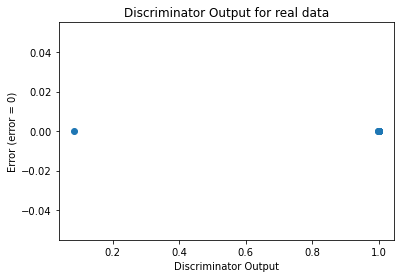

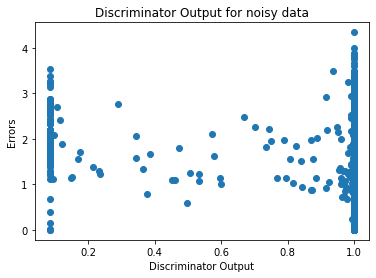

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0087]], device='cuda:0', requires_grad=True)
